# Universidad Autónoma de Nuevo León
# Maestría en ciencia de datos
## Procesamiento y clasificación de datos
### Procesamiento de audio

### Introducción a las Wavelets en Procesamiento de Voz

- Ondículas (_wavelets_)
    - Tipo de Análisis de multirresolución (MRA, por sus siglas en inglés)
    - Analizar señales a diferentes niveles de resolución
    - Oscilación fijada en el tiempo
    - Se compone de escala y ubicación
    - Transformada de ondícula contínua (CWT)
$$W(a, b) = \frac{1}{\sqrt{|a|}} \int_{-\infty}^{\infty} f(t) \psi^*\left(\frac{t - b}{a}\right) \, dt
$$
        - $W(a,b)$ es el coeficiente de la ondícula en la escala $a$ y la posición $b$.
        - $f(t)$ es la señal original que se está transformando.
        - $\psi(t)$ es la función ondícula madre.
        - $\psi^*(t)$ denota el complejo conjugado de la ondícula madre.
        - $a$ es el parámetro de escala que dilata o comprime la ondícula.
        - $b$ es el parámetro de traslación que desplaza la ondícula en el tiempo.
        - $t$ es la variable de tiempo.

#### Ondícula de Morlet

- Función matemática utilizada en la transformada wavelet
- Introducida por Jean Morlet
- Más comúnmente usadas

$$\psi(t) = \pi^{-\frac{1}{4}} e^{j \omega_0 t} e^{-\frac{t^2}{2}}$$

- $\psi(t)$ es la ondícula de Morlet.
- $\pi^{-\frac{1}{4}}$ es un factor de normalización para asegurar que la energía total de la ondícula sea 1.
- $j$ es la unidad imaginaria.
- $\omega_0$ es la frecuencia angular de la función sinusoidal.
- $t$ es la variable de tiempo.


### Librerias


In [2]:
!pip install numpy==1.26.4

import os
 # Reinicia el kernel automáticamente


In [1]:
!pip install numba
!pip install pywavelets
!pip install dtw-python
!pip install "deeplake<4"
!pip install av
!pip install hub

In [3]:
#Librerias

import pywt
import librosa
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import librosa
import pandas as pd
import os

import librosa
from dtw import *
import matplotlib.pyplot as plt
import gc

import os
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import hub
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import soundfile as sf
import os
import numpy as np
import pandas as pd
from IPython.display import Audio


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



/usr/local/lib/python3.11/dist-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.1.16) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [4]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


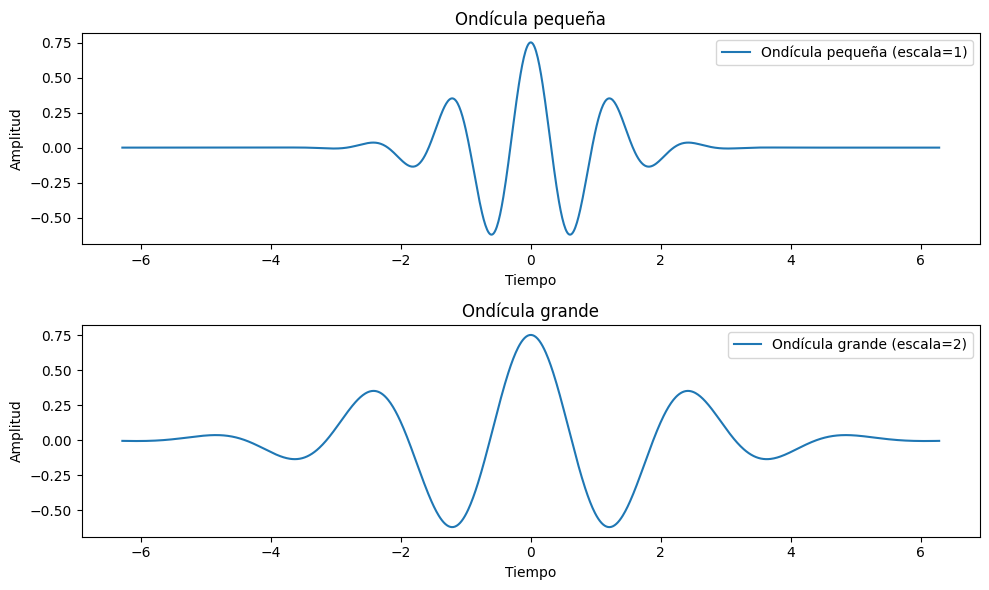

In [5]:

# Definir la función de la ondícula Morlet
def morlet_wavelet(t, scale=1.0, w0=5):
    return np.pi**(-0.25) * np.exp(1j * w0 * t / scale) * np.exp(-0.5 * (t / scale)**2)

# Crear el rango de tiempo
t = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Calcular la ondícula pequeña
wavelet_small = morlet_wavelet(t, scale=1)

# Calcular la ondícula grande
wavelet_large = morlet_wavelet(t, scale=2)

# Crear la figura y los ejes
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Graficar la ondícula pequeña
ax[0].plot(t, wavelet_small, label='Ondícula pequeña (escala=1)')
ax[0].legend()
ax[0].set_title('Ondícula pequeña')
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Amplitud')

# Graficar la ondícula grande
ax[1].plot(t, wavelet_large, label='Ondícula grande (escala=2)')
ax[1].legend()
ax[1].set_title('Ondícula grande')
ax[1].set_xlabel('Tiempo')
ax[1].set_ylabel('Amplitud')

# Mostrar la figura
plt.tight_layout()
plt.show()

Las ondículas capturan información tanto del espectro de frecuencias (como las transformadas de Fourier) como información temporal. Esto las hace más poderosas.

In [10]:
#Leemos todos

# Ruta donde están los audios convertidos a WAV
audio_folder = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/Audio/Tarea"

# Crear lista con la ruta y nombre de cada archivo
data = []
for file in os.listdir(audio_folder):
    if file.endswith(".wav"):  # Filtrar solo archivos de audio
        file_path = os.path.join(audio_folder, file)
        name=file.replace("copia", "")
        name=name.replace("2", "")
        name=name.replace(".wav", "")
        name.replace(" ", "")
        #file_path=file_path.replace("copia", "")
        data.append([file_path, name])  # Guardar ruta y nombre

# Crear DataFrame con dos columnas: "file_path" y "file_name"
df = pd.DataFrame(data, columns=["path", "tipo"])

# Mostrar las primeras filas
#df=df.head(3)


Una muestra del maaullido del gatito

In [6]:
print(df.loc[0, 'tipo'])

audio_path = df.loc[0, 'path']
Audio(audio_path)

Ronroneo   (1)


In [7]:
print(df.loc[1, 'tipo'])

audio_path = df.loc[1, 'path']
Audio(audio_path)

Cariñitos 


In [8]:
print(df.loc[2, 'tipo'])

audio_path = df.loc[2, 'path']
Audio(audio_path)

Comida


In [11]:
print(df.loc[3, 'tipo'])

audio_path = df.loc[3, 'path']
Audio(audio_path)

Molestando 


<ipython-input-12-21dd262f3595>:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-12-21dd262f3595>:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-12-21dd262f3595>:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: Futur

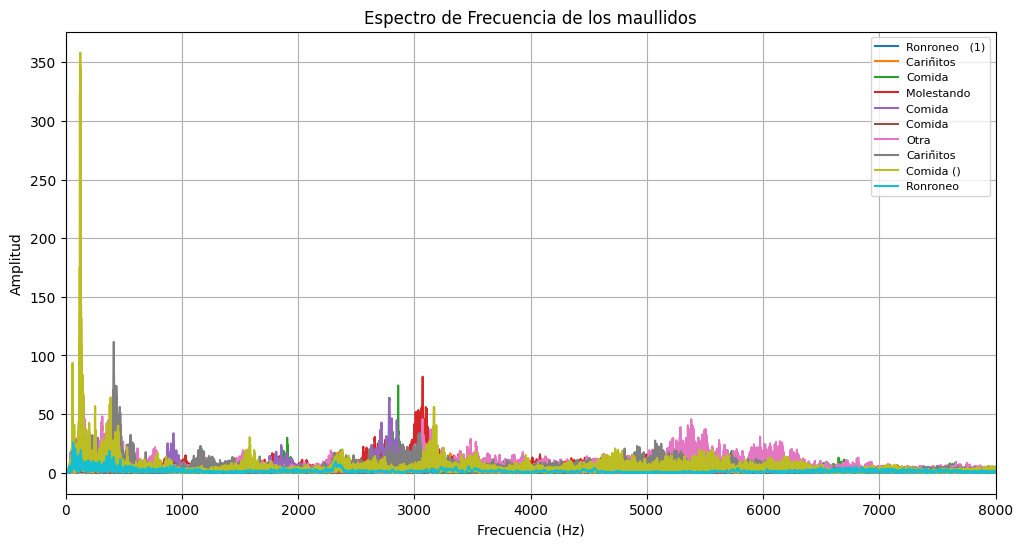

In [12]:


#import scipy.fftpack

plt.figure(figsize=(12, 6))
i=0
# Procesar cada archivo de audio
for file in range(0,df.shape[0]):


    audio_path = df.loc[file, 'path']
    audio =df.loc[file, 'tipo']
    # Cargar el audio
    y, sr = librosa.load(audio_path)

    # Calcular la Transformada de Fourier del audio
    fft_spectrum = np.abs(scipy.fftpack.fft(y))[: len(y) // 2]
    freqs = np.linspace(0, sr / 2, len(fft_spectrum))
    i=i+1
    #tipo=df.loc[i, 'tipo']
    # Graficar el espectro de frecuencias
    plt.plot(freqs, fft_spectrum, label=audio)

# Configurar el gráfico
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Espectro de Frecuencia de los maullidos")
plt.legend(loc="upper right", fontsize=8)
plt.xlim(0, 8000)  # Limitar a 8000 Hz (rango audible principal)
plt.grid()
plt.show()


En promedio la amplitud es muy parecida cuando se tienen las mismas frecuencias.

In [13]:
display(audio_path)

'/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/Audio/Tarea/Ronroneo  copia.wav'

<ipython-input-14-fbd184ea2c08>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-14-fbd184ea2c08>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-14-fbd184ea2c08>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/

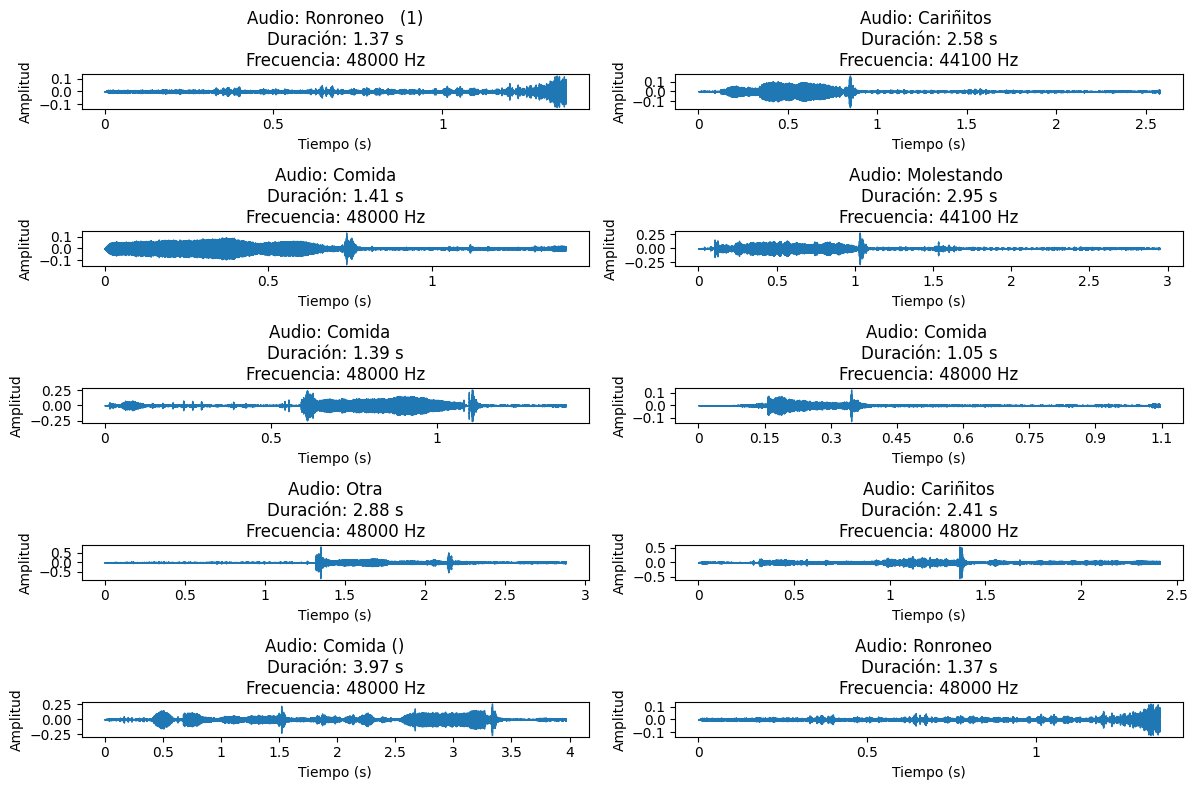

In [14]:


plt.figure(figsize=(12, 8))

# Procesar cada archivo de audio
for i in range(0, df.shape[0]):
    audio_path = df.loc[i, 'path']
    tipo=df.loc[i, 'tipo']

    # Cargar el audio
    y, sr = librosa.load(audio_path, sr=None)
    # Obtener la duración del audio
    duration = librosa.get_duration(y=y, sr=sr)
    # Graficar la forma de onda (Amplitud vs Tiempo)
    plt.subplot(5, 2, i+1)  # Subgráfico para cada archivo

    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Audio: {tipo}\nDuración: {duration:.2f} s\nFrecuencia: {sr} Hz")
    #plt.title(f"Audio: {tipo}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()


Se puede observar en como los maullidos que son para pedir comida tienen una frecuencia idéntinca y su amplitud de onda es muy parecida.

In [15]:
import pywt

In [16]:

# Inicializar listas para almacenar los coeficientes de la DWT
approx_coeffs = []
detail_coeffs = []

# Procesar cada archivo de audio en el DataFrame
for index, row in df.iterrows():
    audio_path = row['path']

    # Cargar el audio
    y, sr = librosa.load(audio_path, sr=None)

    # Calcular la DWT (usando la onda 'db1' - Haar)
    coeffs = pywt.dwt(y, 'db1')
    cA, cD = coeffs  # cA es la aproximación, cD es el detalle

    # Almacenar los coeficientes de la DWT
    approx_coeffs.append(cA)
    detail_coeffs.append(cD)

# Agregar los coeficientes de la DWT como columnas en el DataFrame
df['approx_coeffs'] = approx_coeffs
df['detail_coeffs'] = detail_coeffs

# Mostrar el DataFrame con los nuevos coeficientes
print(df.head())


<ipython-input-16-131e4e384beb>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-16-131e4e384beb>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-16-131e4e384beb>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/libro

                                                path            tipo  \
0  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  Ronroneo   (1)   
1  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...     Cariñitos    
2  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...          Comida   
3  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...     Molestando    
4  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...        Comida     

                                       approx_coeffs  \
0  [0.0, 2.1579186e-05, 0.0, 0.0, 6.473756e-05, 0...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [2.1579186e-05, 0.00012947511, 0.00028052944, ...   
3  [0.0, 0.0, 0.0, 2.1579186e-05, 4.3158372e-05, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                       detail_coeffs  
0  [0.0, -2.1579186e-05, 0.0, 0.0, -2.1579186e-05...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [-2.1579186e-05, -4.3158372e-05, -2.1579195e-0...  
3  [0.0, 0

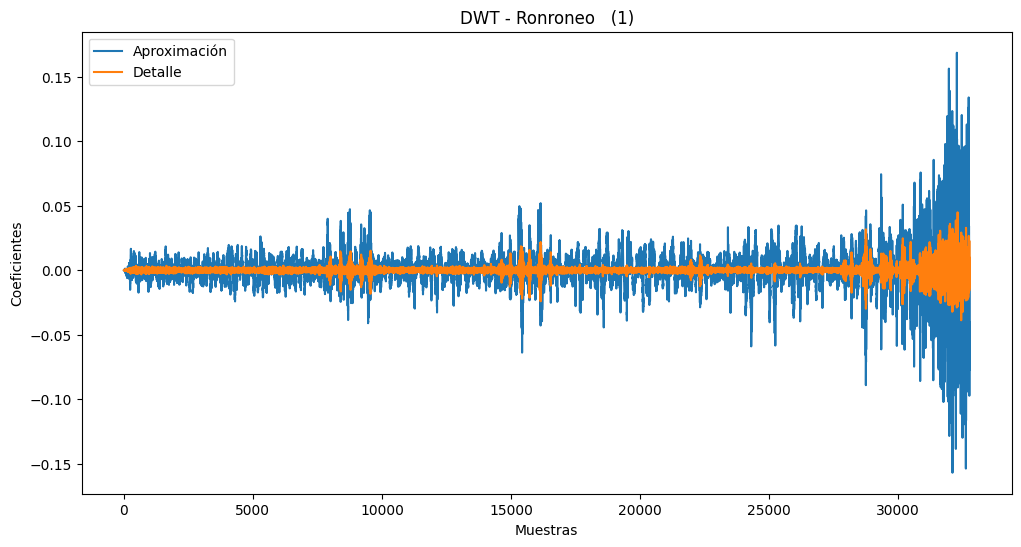

In [17]:


# Graficar los coeficientes de la DWT para el primer archivo
plt.figure(figsize=(12, 6))
plt.plot(df['approx_coeffs'][0], label="Aproximación")
plt.plot(df['detail_coeffs'][0], label="Detalle")
plt.title(f"DWT - {df['tipo'][0]}")
plt.xlabel("Muestras")
plt.ylabel("Coeficientes")
plt.legend()
plt.show()


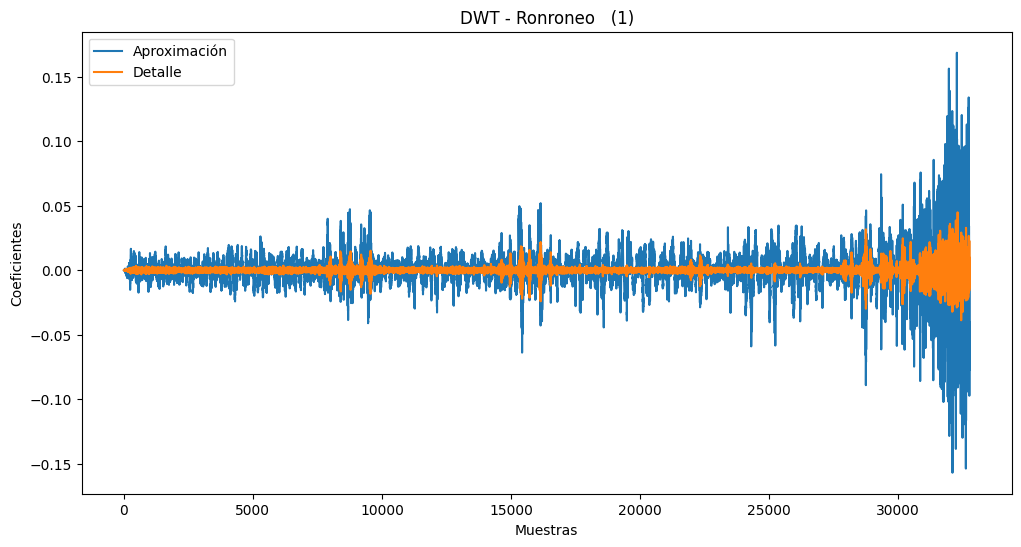

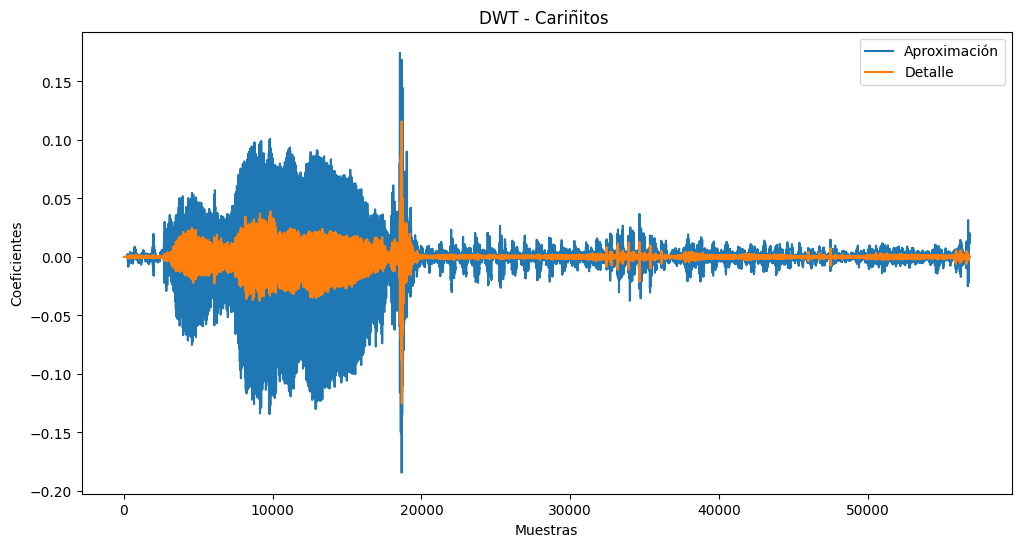

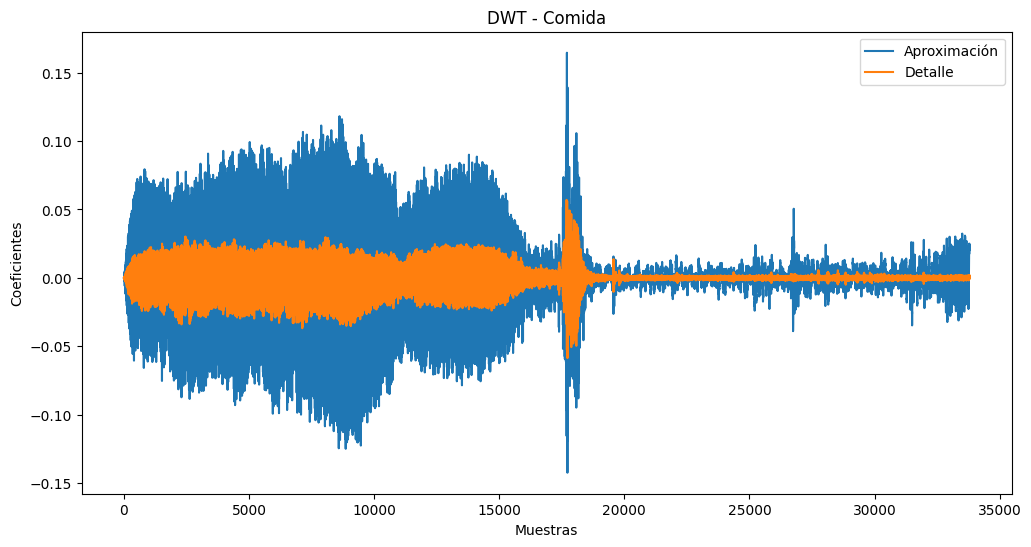

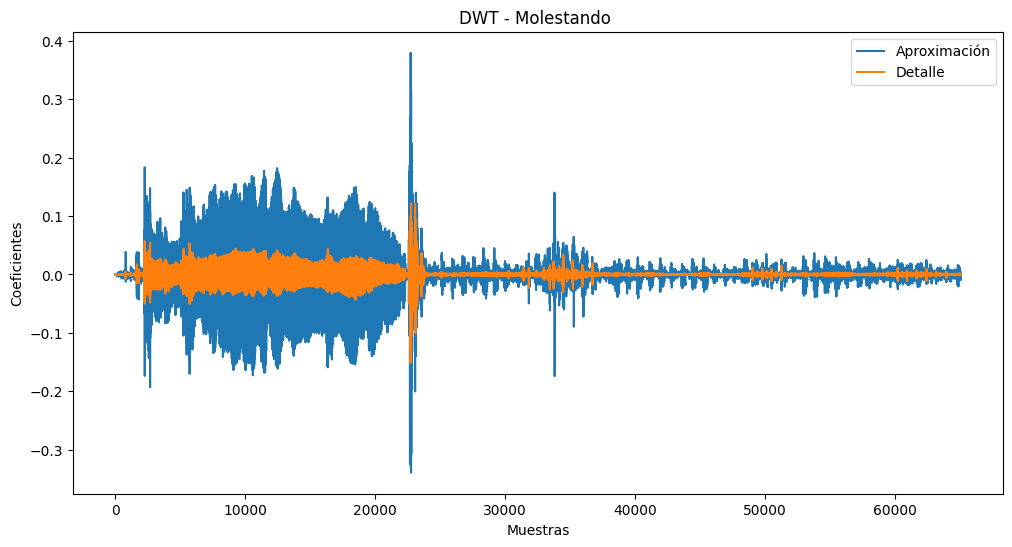

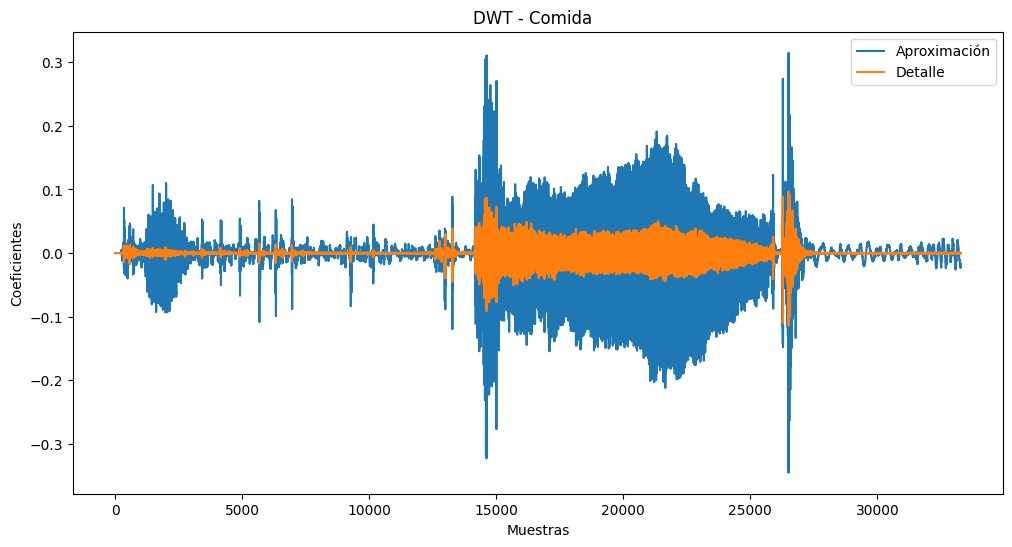

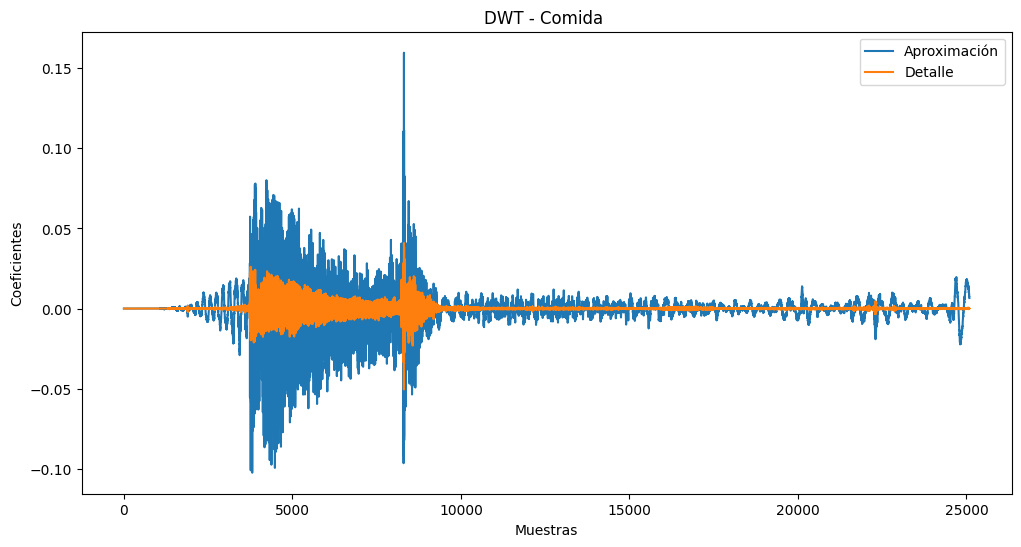

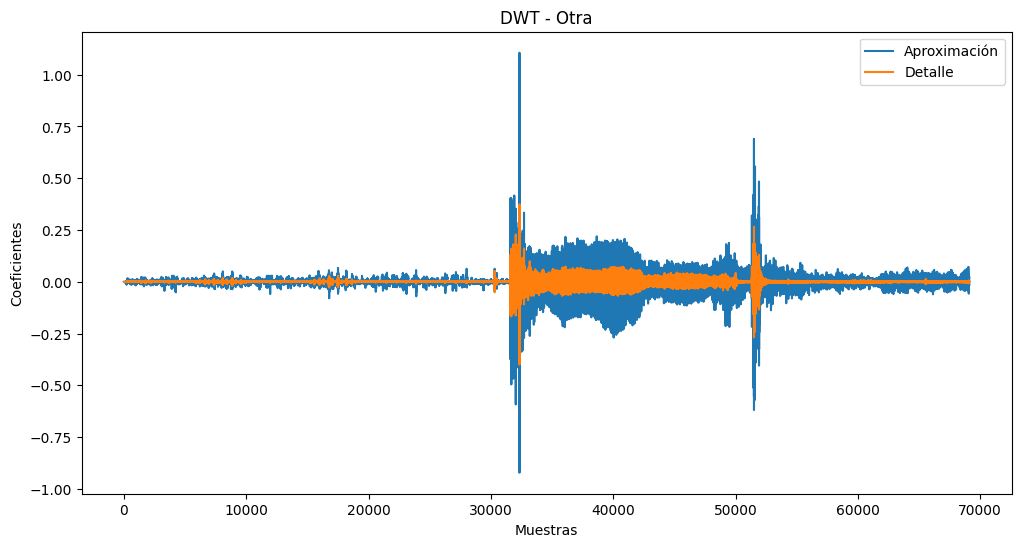

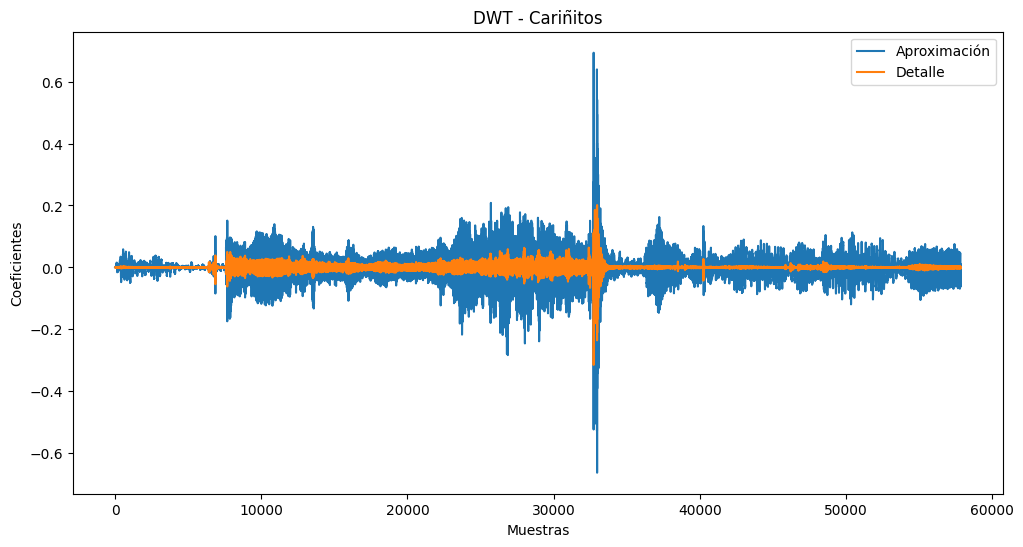

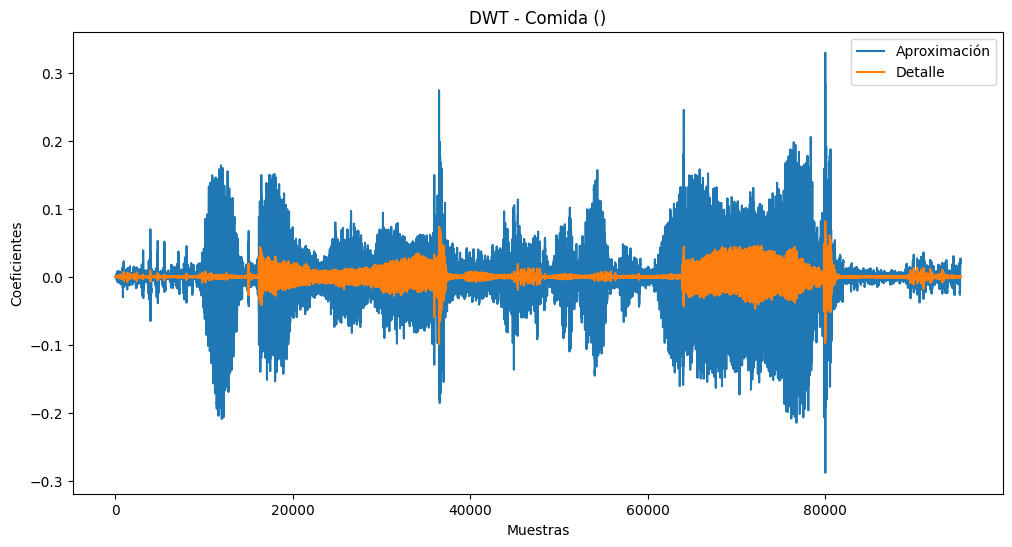

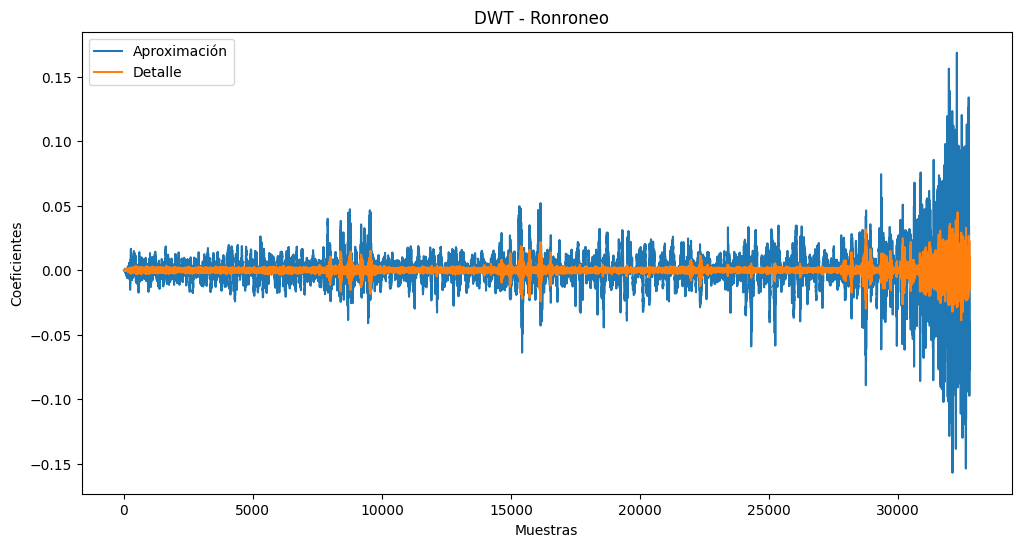

In [18]:


# Graficar los coeficientes de la DWT para cada archivo en el DataFrame
for index, row in df.iterrows():
    # Obtener los coeficientes de aproximación y detalle de cada archivo
    approx_coeff = row['approx_coeffs']
    detail_coeff = row['detail_coeffs']

    # Graficar los coeficientes de la DWT
    plt.figure(figsize=(12, 6))
    plt.plot(approx_coeff, label="Aproximación")
    plt.plot(detail_coeff, label="Detalle")
    plt.title(f"DWT - {row['tipo']}")
    plt.xlabel("Muestras")
    plt.ylabel("Coeficientes")
    plt.legend()
    plt.show()


La aproximación representa una la versión suavizada del sonido y el detalle son los sonidos más finos.

Para todos los casos las amplitudes van en primedio entre -0-3 y 0.3


Curiosamente, para los mismos tipos alcanzan amplitudes similares, por lo que podríamos interpretar que el maullido del gatito si depende de acuerdo a la necesidad que quiere trasmitir.

<ipython-input-16-7acc68630d1c>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


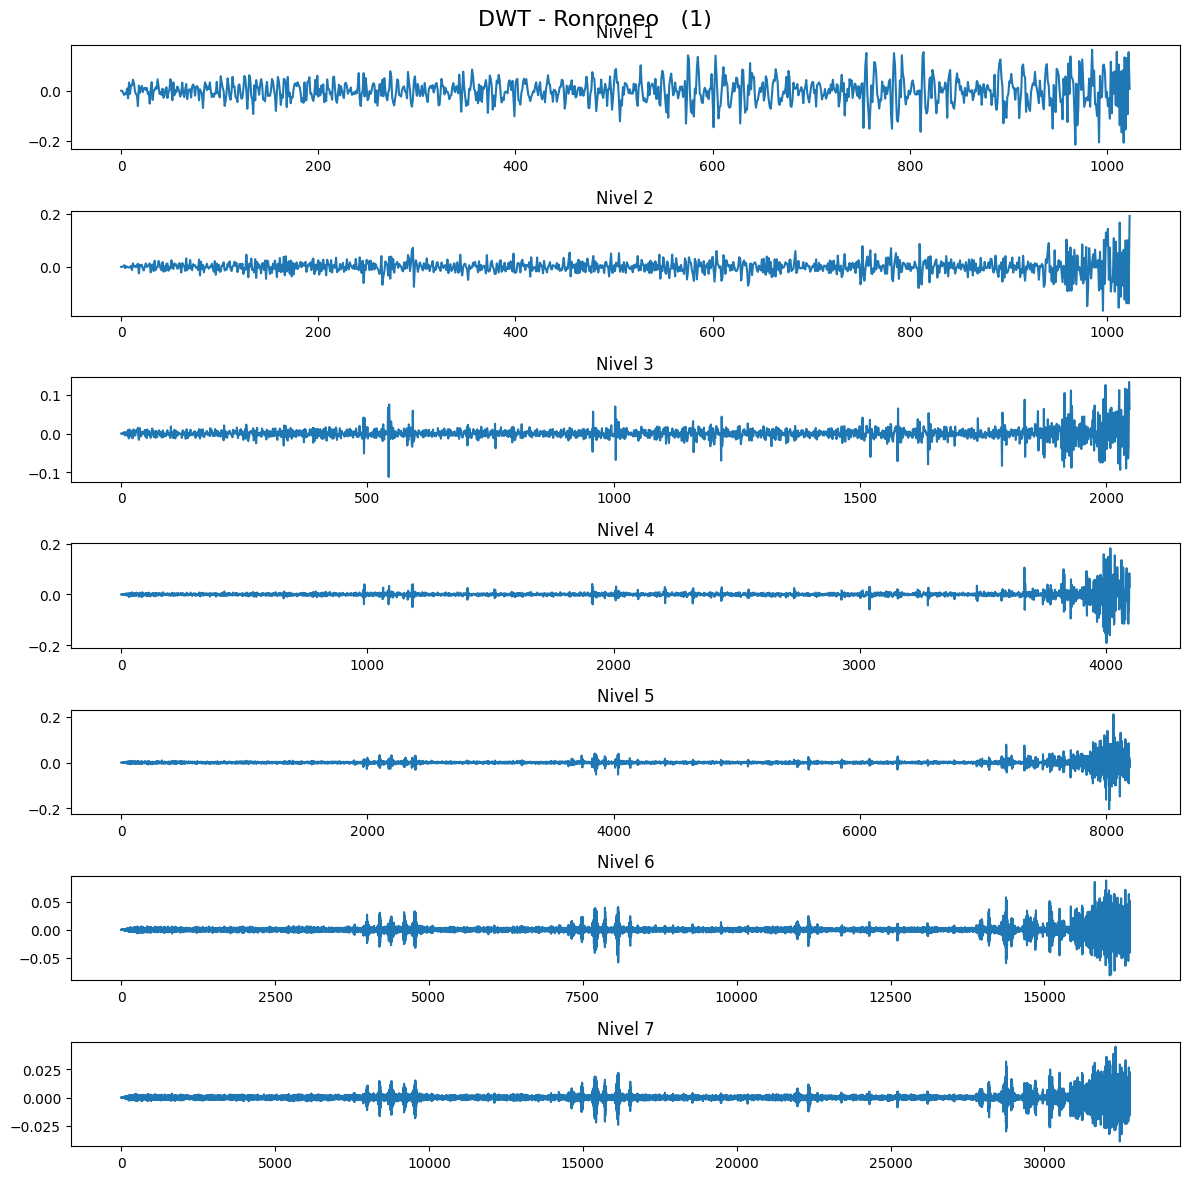

<ipython-input-16-7acc68630d1c>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


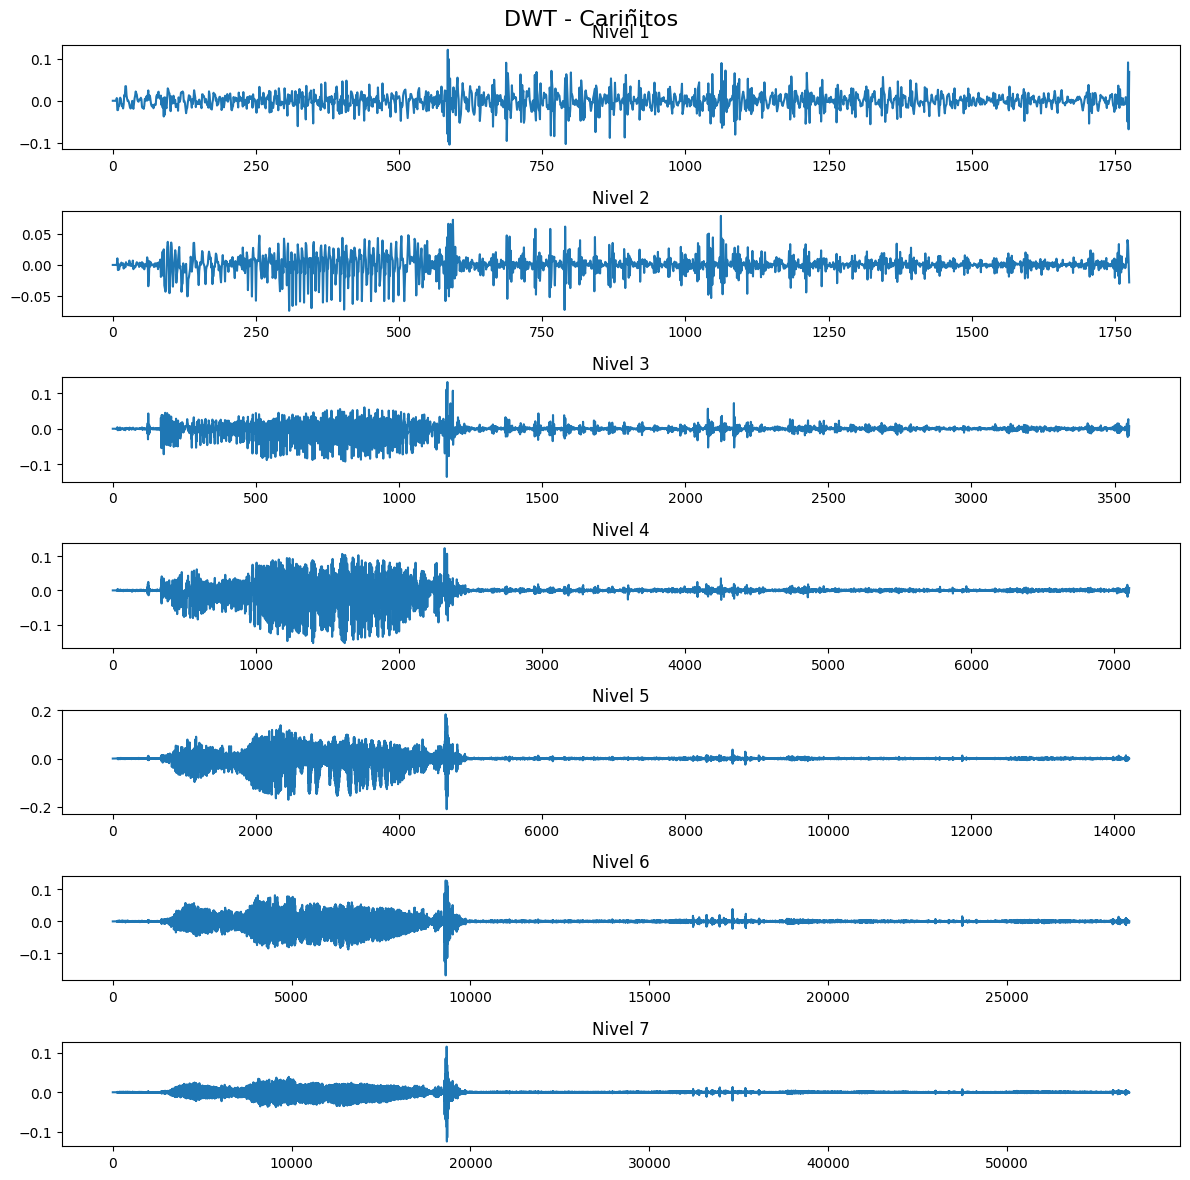

<ipython-input-16-7acc68630d1c>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


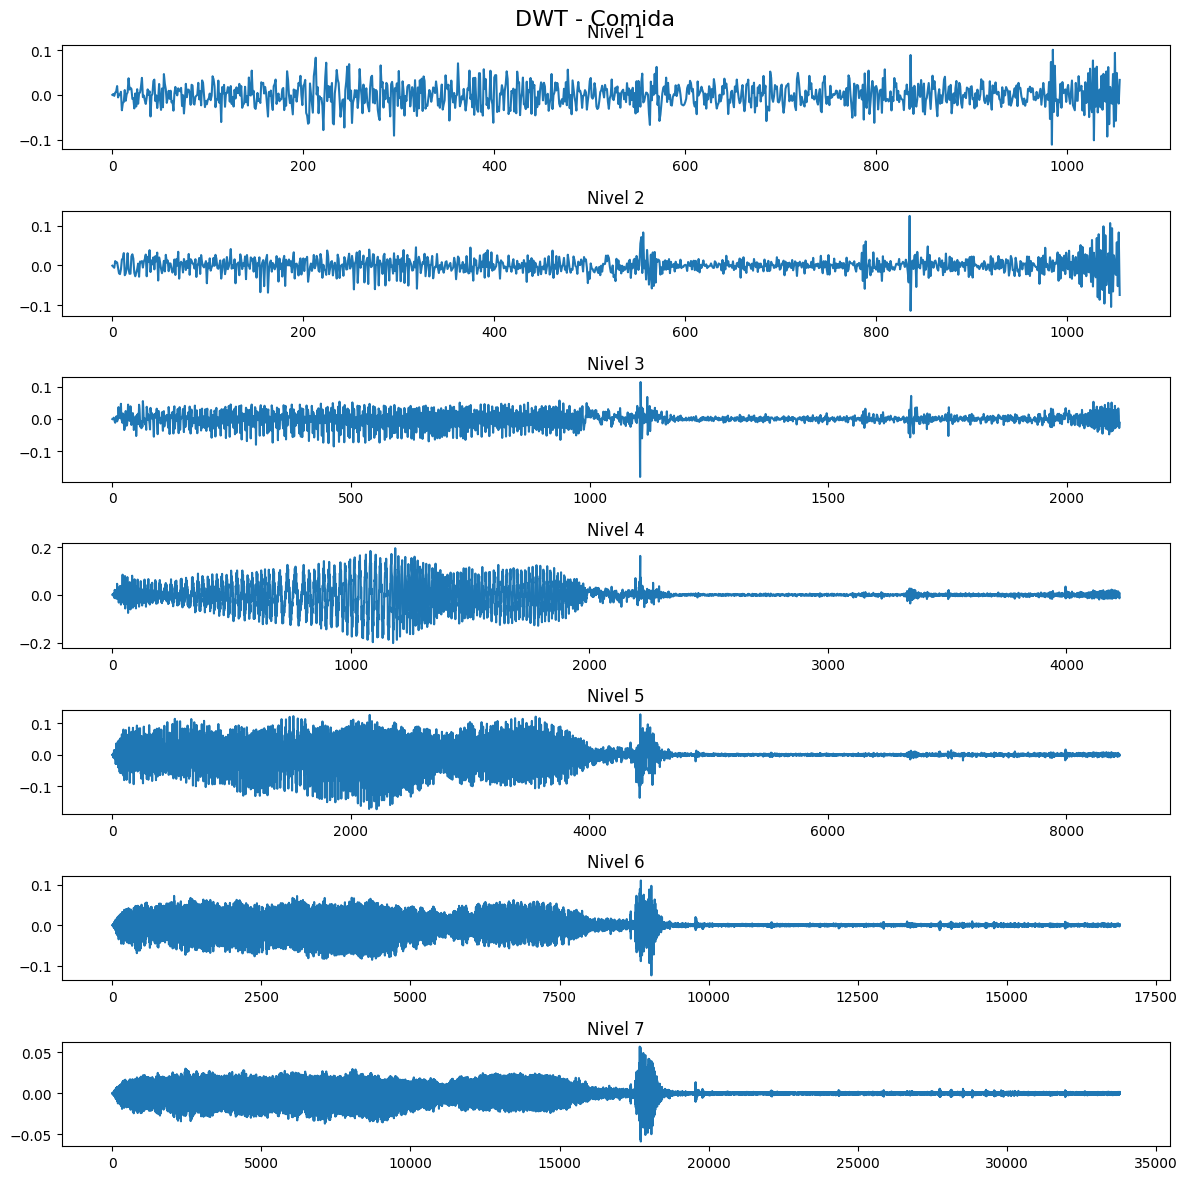

<ipython-input-16-7acc68630d1c>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


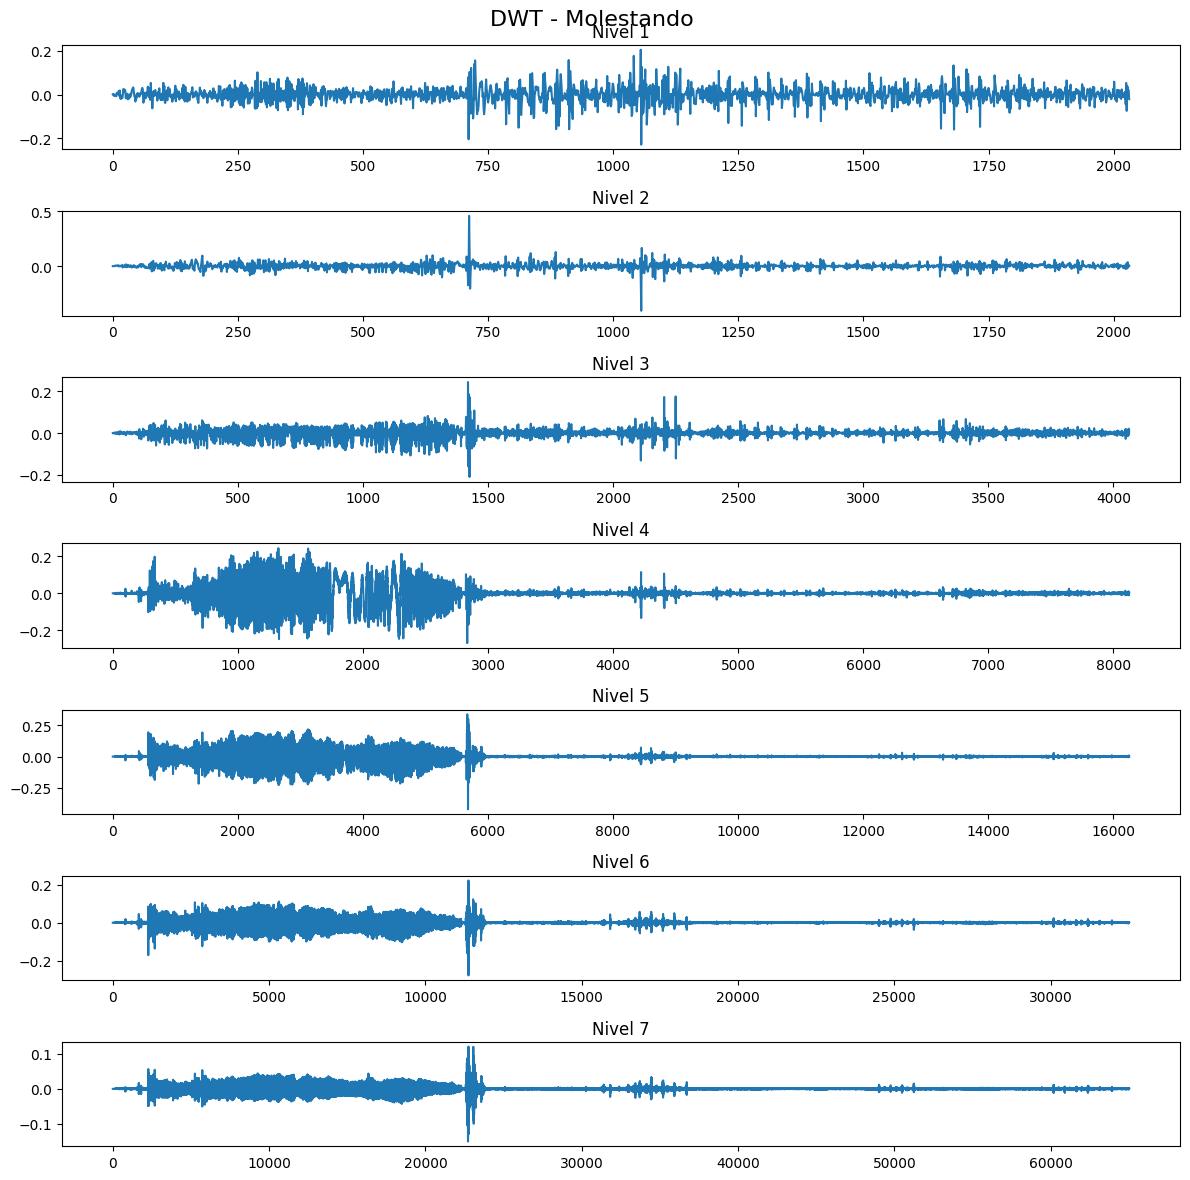

<ipython-input-16-7acc68630d1c>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


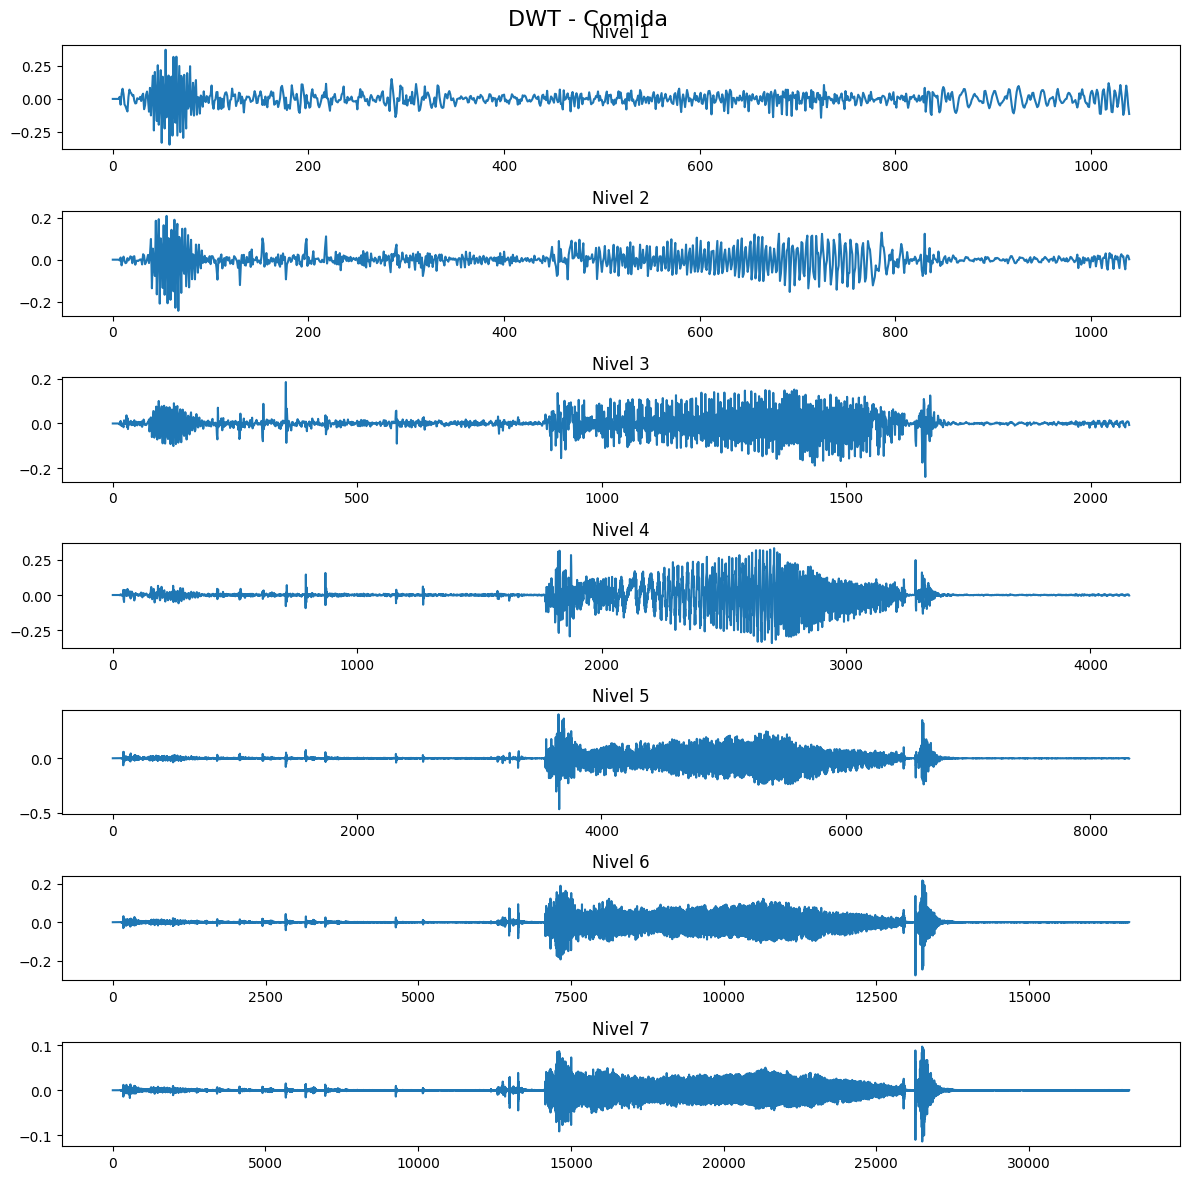

<ipython-input-16-7acc68630d1c>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


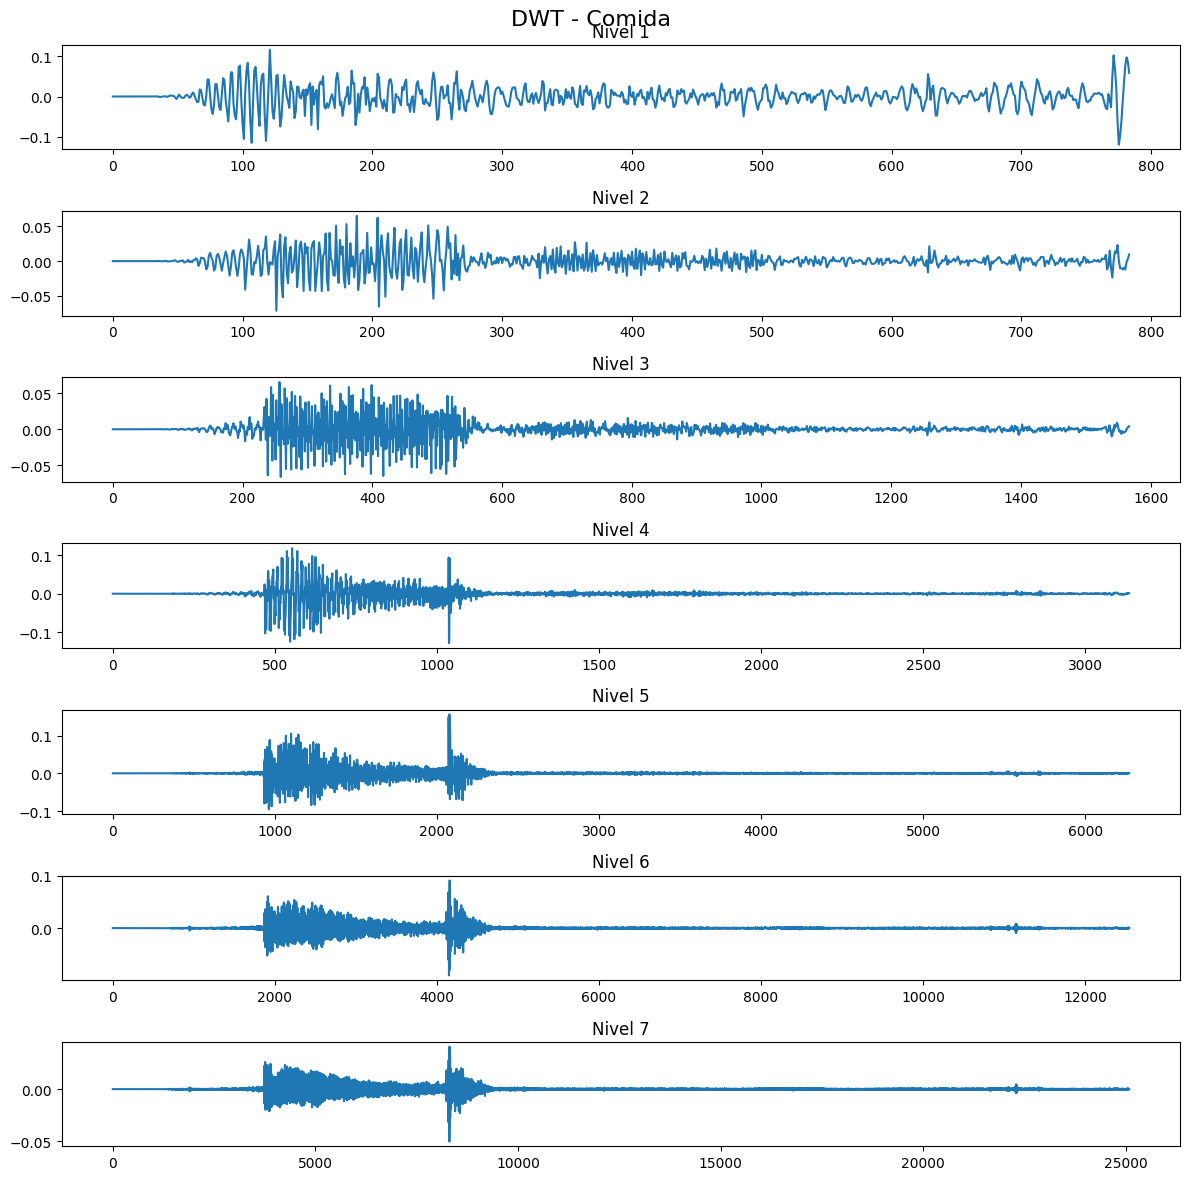

<ipython-input-16-7acc68630d1c>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


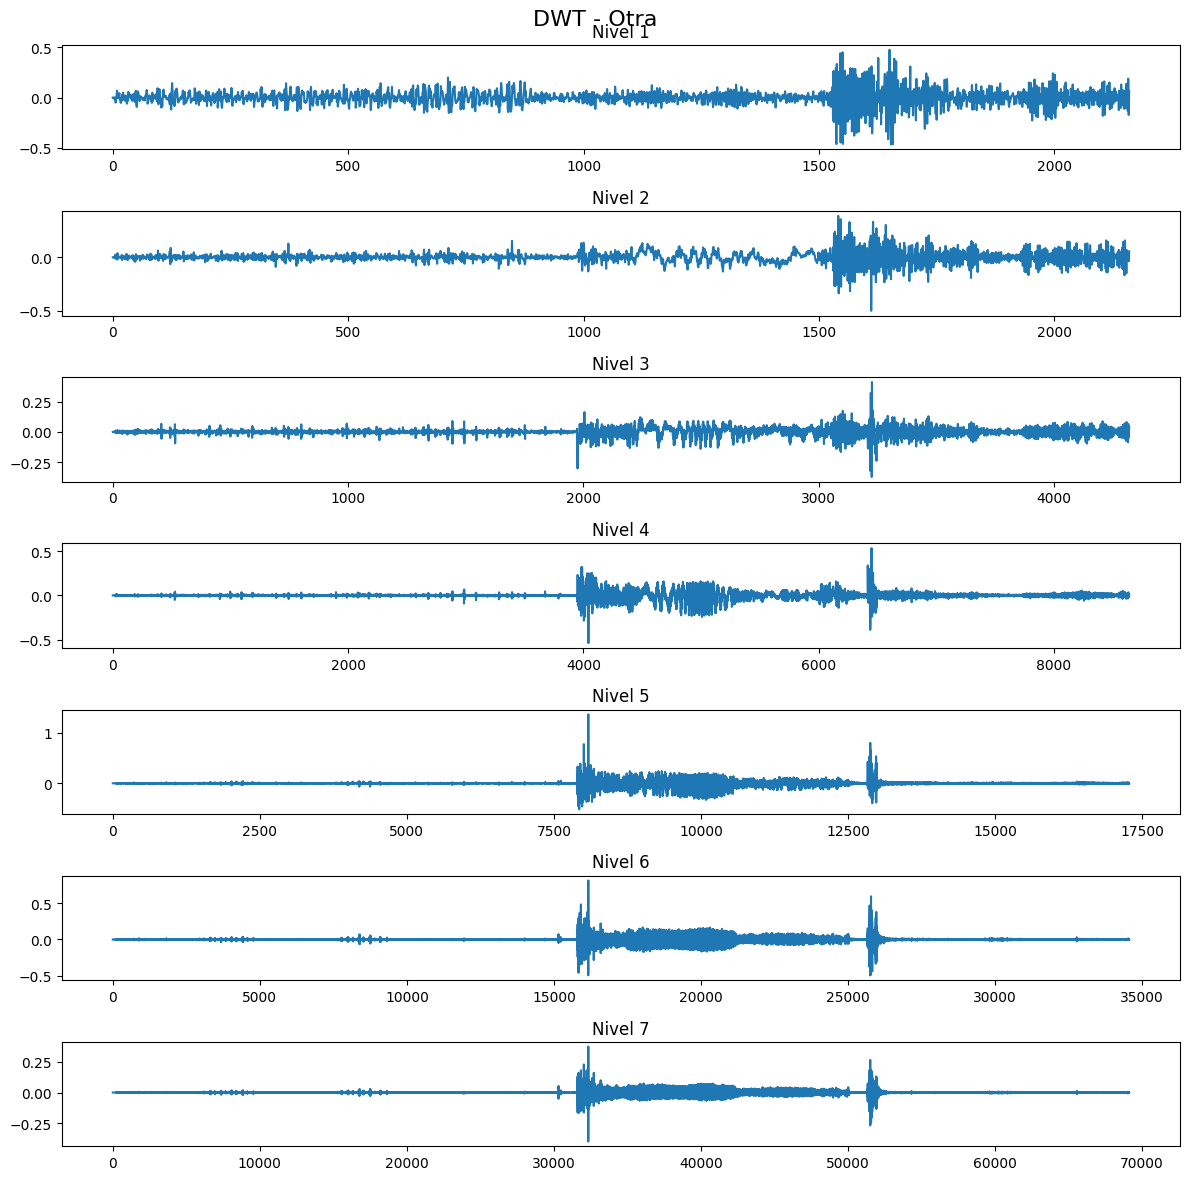

<ipython-input-16-7acc68630d1c>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


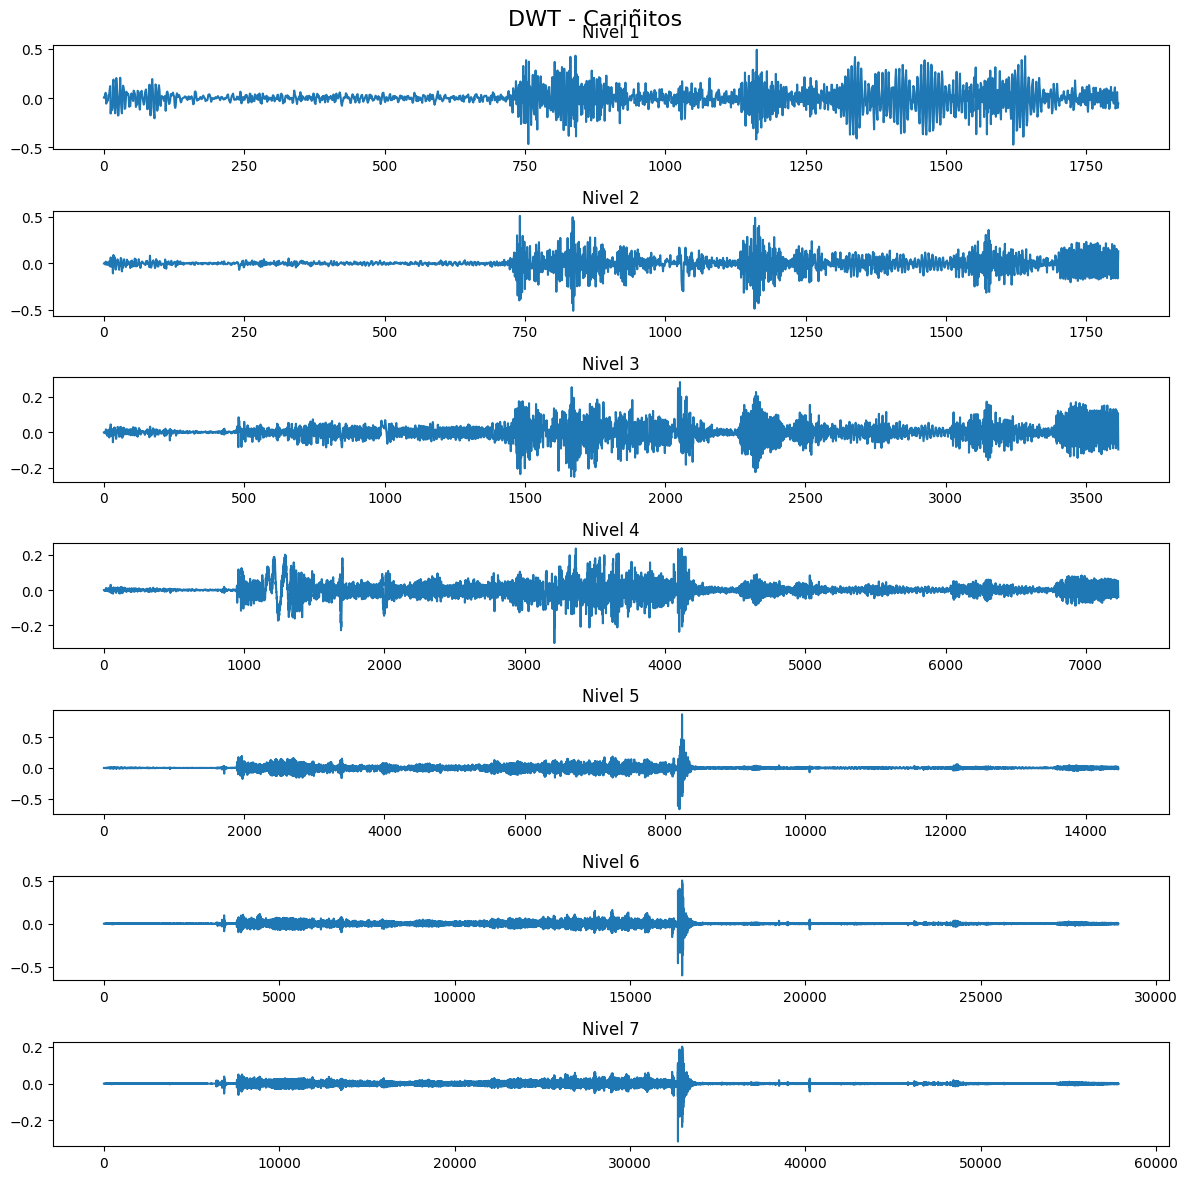

<ipython-input-16-7acc68630d1c>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


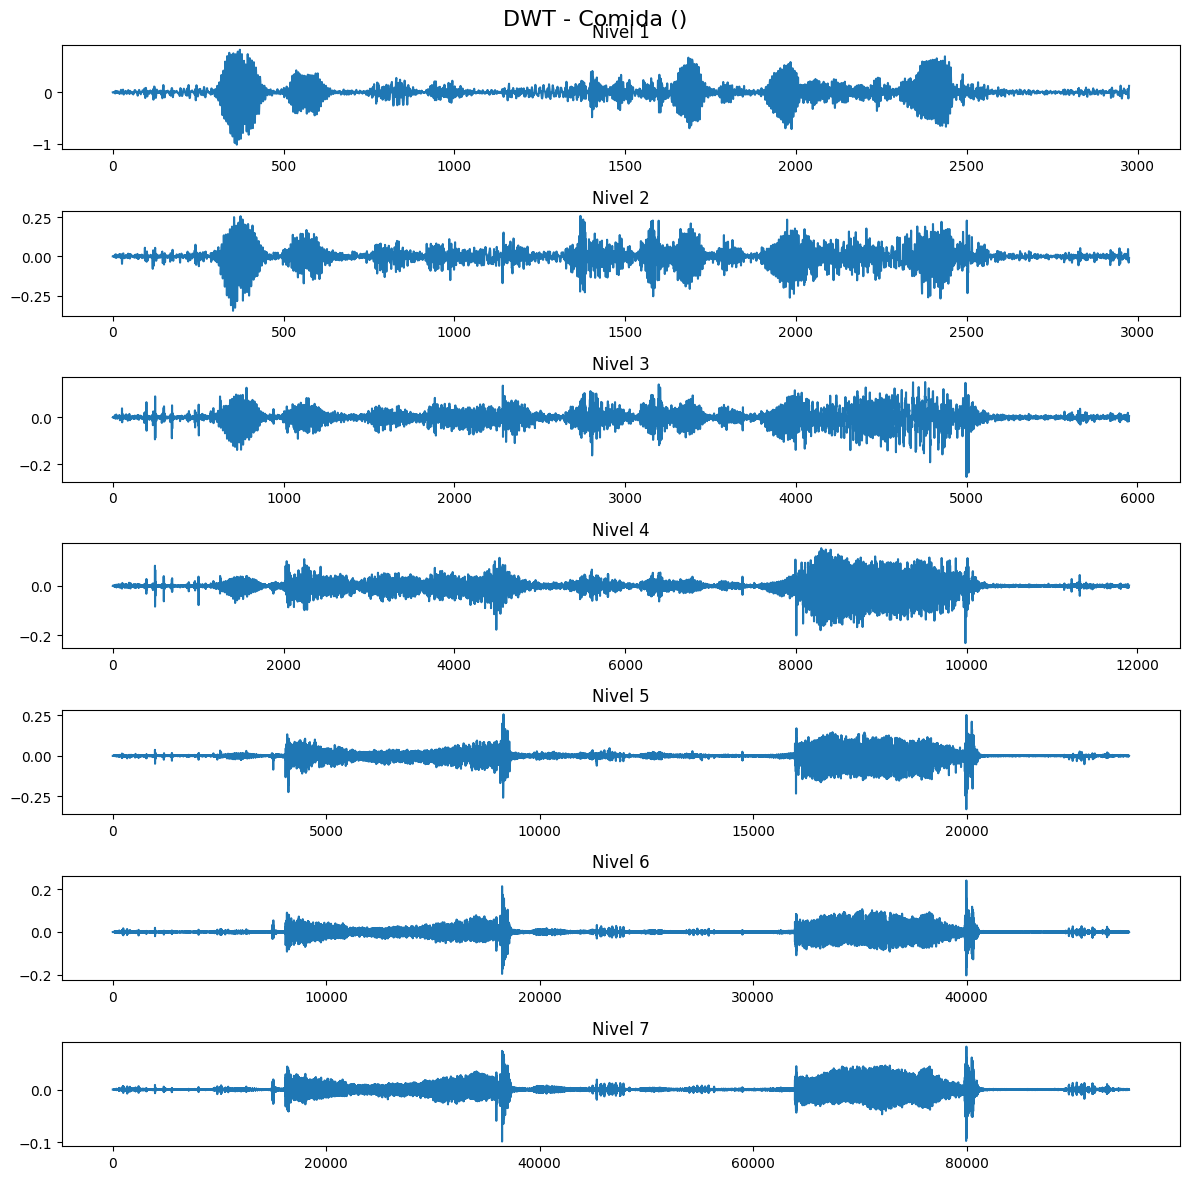

<ipython-input-16-7acc68630d1c>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


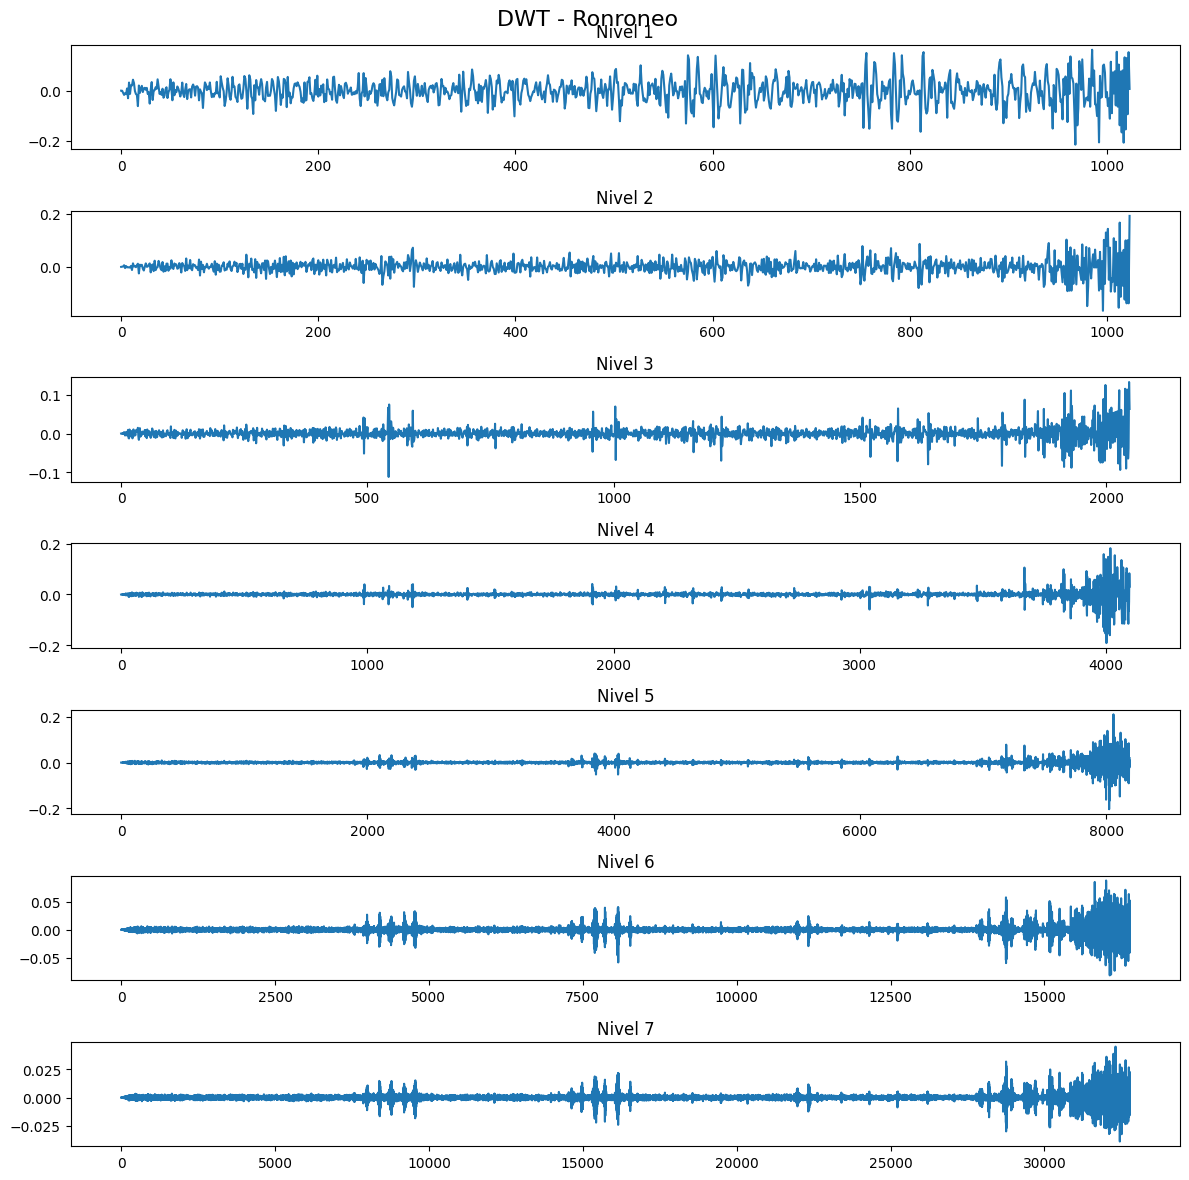

In [16]:


# Graficar la descomposición de la DWT para cada archivo en el DataFrame
for index, row in df.iterrows():
    audio_path = row['path']  # Ruta del archivo de audio

    # Cargar el audio
    audio, sr = librosa.load(audio_path, sr=None)

    # Realizar la descomposición en 6 niveles usando la onda 'db1' (Haar)
    coeffs = pywt.wavedec(audio, 'db1', level=6)

    # Visualización de la descomposición
    fig, axs = plt.subplots(len(coeffs), 1, figsize=(12, 12))
    for i, coeff in enumerate(coeffs):
        axs[i].plot(coeff)
        axs[i].set_title(f'Nivel {i+1}')

    # Título con el nombre del archivo
    fig.suptitle(f'DWT - {row["tipo"]}', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Ajustar para evitar que se solapen los títulos
    plt.show()


Podemos identificar patrones en los diferentes maullidos, por ejemplo, para los que pertenece al mismo tipo, observamos que el ronroneo antes y después del maullido alcanza niveles similares en cada nivel.

### Dynamic Time Warping (DTW)

Utiliza DTW para medir la similitud entre los coeficientes detallados de las dos señales.

In [7]:
'''
# Lista vacía para almacenar los audios
audio_list = []
head=df.head(2)
# Cargar los audios desde las rutas en la columna 'path' con verificación
for path in head['path']:
    if os.path.exists(path):  # Verifica si la ruta existe
        try:
            # Cargar el archivo de audio
            audio, sr = librosa.load(path, sr=None)  # sr=None mantiene la frecuencia original
            audio_list.append(audio)
        except Exception as e:
            print(f"Error al cargar el archivo {path}: {e}")
            audio_list.append(None)  # Si ocurre un error, agregamos None
    else:
        print(f"El archivo {path} no existe.")
        audio_list.append(None)  # Si el archivo no existe, agregamos None

# Agregar la lista de audios como una nueva columna en el DataFrame
df['audio'] = 1

# Mostrar las primeras filas del DataFrame con la nueva columna 'audio'
print(df.head())
'''

<ipython-input-7-aaa48f0073b7>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(path, sr=None)  # sr=None mantiene la frecuencia original
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


                                                path            tipo  audio
0  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...  Ronroneo   (1)      1
1  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...     Cariñitos       1
2  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...          Comida      1
3  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...     Molestando       1
4  /content/drive/MyDrive/Leslye/Escuela/MCD/PCD/...        Comida        1


<ipython-input-7-aaa48f0073b7>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(path, sr=None)  # sr=None mantiene la frecuencia original
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [8]:
audio_list=[]

path=df.loc[0, 'path']

# Cargar el archivo de audio
audio, sr = librosa.load(path, sr=None)  # sr=None mantiene la frecuencia original
audio_list.append(audio)

path=df.loc[2, 'path']
audio, sr = librosa.load(path, sr=None)  # sr=None mantiene la frecuencia original
audio_list.append(audio)

audio_list

<ipython-input-8-0b487981e1c0>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(path, sr=None)  # sr=None mantiene la frecuencia original
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-8-0b487981e1c0>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(path, sr=None)  # sr=None mantiene la frecuencia original
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[array([ 0.        ,  0.        ,  0.        , ..., -0.05761719,
        -0.03341675, -0.02383423], dtype=float32),
 array([0.00000000e+00, 3.05175781e-05, 6.10351562e-05, ...,
        1.52587891e-02, 1.40075684e-02, 1.15356445e-02], dtype=float32)]

In [9]:
audio1 = audio_list[0]
audio2 = audio_list[1]  #

gc.collect()

4885

In [ ]:


# DataFrame para aplicar DTW


#Audio formato numpy
# Alineación dinámica (DTW)
alignment = dtw(audio1, audio2, keep_internals=True)

# Visualización de la curva de alineación (warping curve)
alignment.plot(type="threeway")

# Mostrar el gráfico
plt.show()


### Tarea

- Realizar una implementación de clasificación parecida a la de [este sitio](https://adityadutt.medium.com/audio-classification-using-wavelet-transform-and-deep-learning-f9f0978fa246) a partir de ondículas y redactar experiencias. Sube este reporte en tu repositorio

### Referencias

- https://adityadutt.medium.com/audio-classification-using-wavelet-transform-and-deep-learning-f9f0978fa246
- https://musicinformationretrieval.com/dtw_example.html
- [ ] https://rtavenar.github.io/blog/dtw.html